In [4]:
%load_ext autoreload
%autoreload 2
import sys
import h5py
from tqdm.notebook import tqdm
import scqubits as sq
sys.path.append('..')
filedirectory = "//Users//joancaceres//Documents//FERBO//FB_W10_S4//run2//FBW10S4_"
from src.utilities import *
from scipy.optimize import curve_fit
from src.fitting import get_transitions_from_levels, plot_transitions, fit_fluxonium2
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

# Datasets

In [5]:
datasets = {
    'sts_power':        409931,
    'res_fluq':         416866,
    'two_res':          200907,
    'sts_flux':         411703,
    'sts_flux_zoom':    413199,
    'flux_drifting':    421220,
    'sts_power_change': 418329,   
    'sts_power_change2':421479,
    'tts_left':         422696,
    'tts_upper':        422958,
    'tts_lower':        424530,
    'tts_zero':         422231,
    'tts_double':       401277,
    'rabi':             406035,
    'rabi_chevron':     426128,
    't1':               405783,    
    'ramsey':           421172,
    'flux_center':      427297,
}

In [6]:
data = {}
for key, datanumber in tqdm(datasets.items()):
    data[key] = load_data(filedirectory +str(datanumber))
    if 'freq' in data[key]:
        data[key]['freq'] *= 1e-9
    elif 'detuning' in data[key]:
        data[key]['detuning'] *= 1e-6

  0%|          | 0/18 [00:00<?, ?it/s]

# Single tone spectroscopy

## Single tone spectroscopy vs. gain

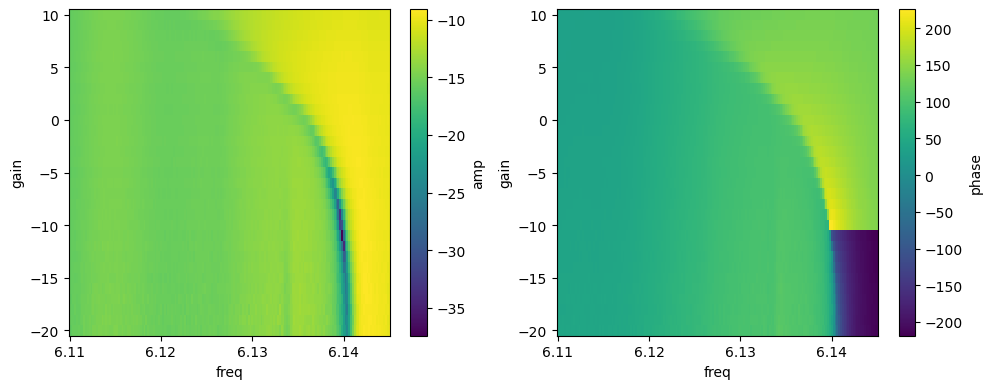

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
plot3D(
    data_dict=data['sts_power'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax[0],
    fig=fig,
)

plot3D(
    data_dict=data['sts_power'],
    x_key='freq',
    y_key='gain',
    z_key='phase',
    ax=ax[1],
    fig=fig,
    )
plt.show()

### Additional resonance

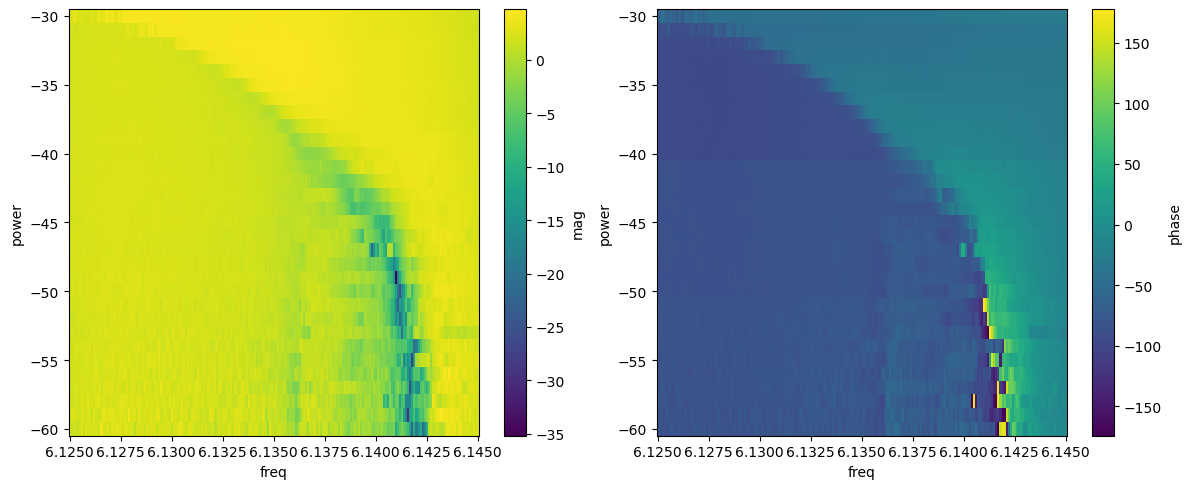

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
plot3D(
    data_dict=data['two_res'],
    x_key='freq',
    y_key='power',
    z_key='mag',
    ax=ax[0],
    fig=fig
)

plot3D(
    data_dict=data['two_res'],
    x_key='freq',
    y_key='power',
    z_key='phase',
    ax=ax[1],
    fig=fig
)
plt.show()

### Resonator frequency fluctuation

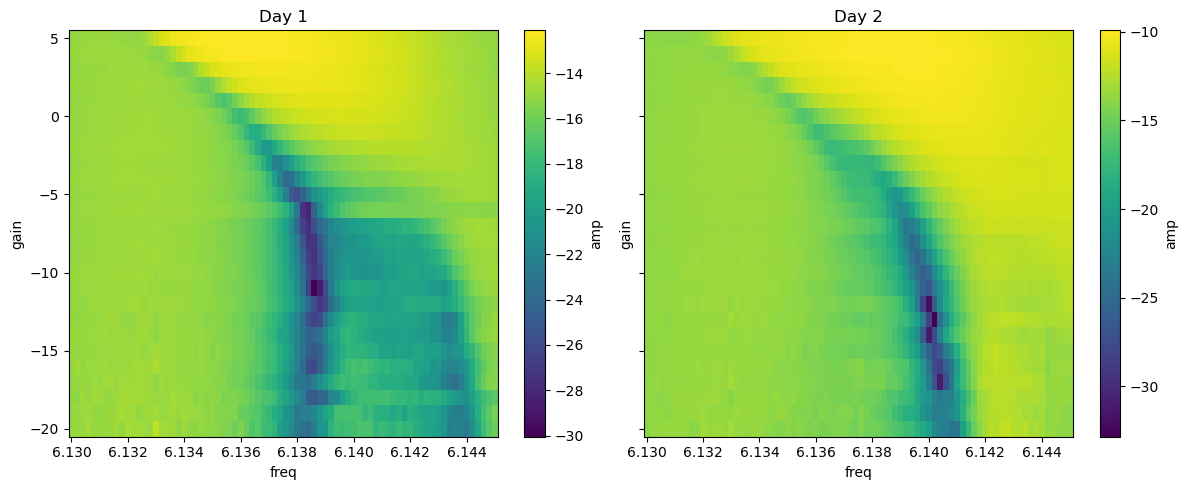

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), sharey=True)
ax[0].set_title('Day 1')
ax[1].set_title('Day 2')
plot3D(
    data_dict=data['sts_power_change'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax[0],
    fig=fig
)

plot3D(
    data_dict=data['sts_power_change2'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax[1],
    fig=fig
)
plt.show()

## Single tone spectroscopy vs. flux

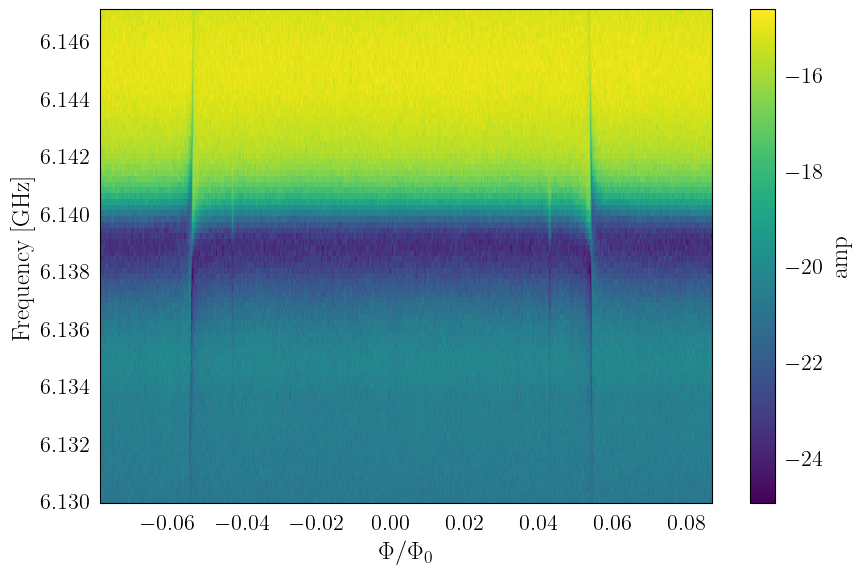

In [ ]:
voltage_period = 3.033
zero_flux = 1.5373

for key in ['sts_flux','sts_flux_zoom']:
    data[key]['phi'] = (data[key]['flux']-zero_flux)/voltage_period

fig, ax = plt.subplots(1,1,figsize=(9,6))
plot3D(
    data_dict=data['sts_flux'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
    ax=ax,
    fig=fig
)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
plt.show()

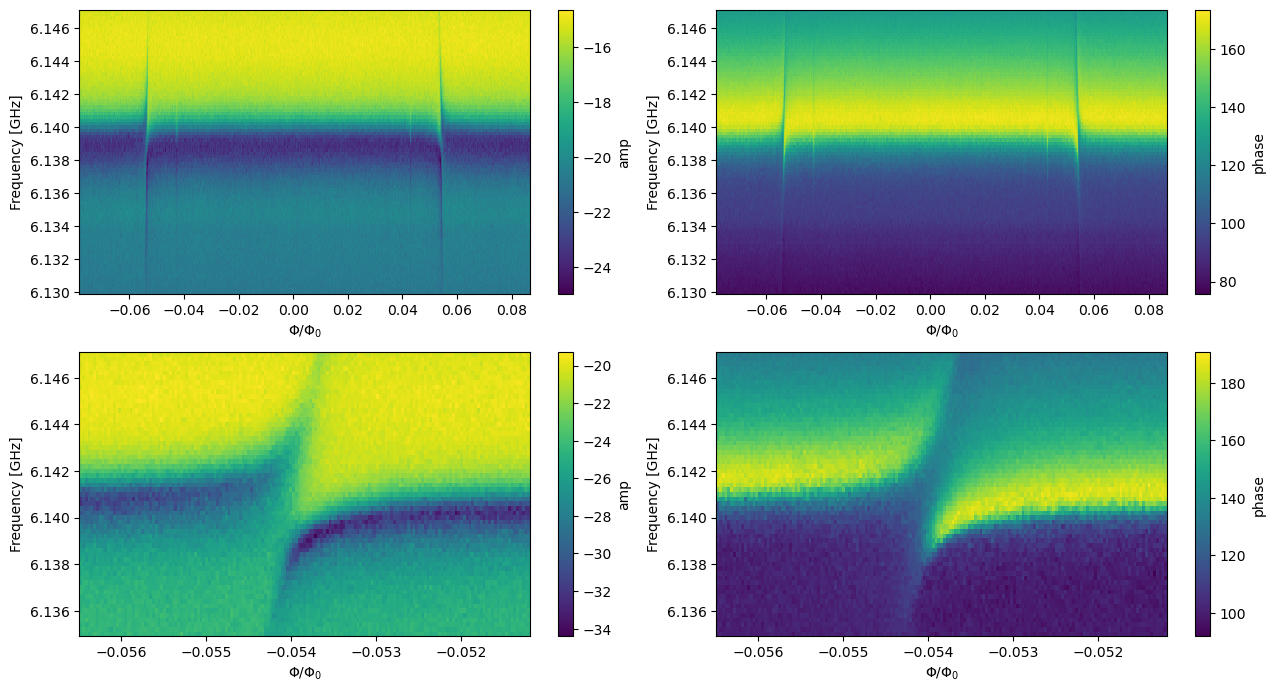

In [ ]:
voltage_period = 3.033
zero_flux = 1.5373

for key in ['sts_flux','sts_flux_zoom']:
    data[key]['phi'] = (data[key]['flux']-zero_flux)/voltage_period

fig, ax = plt.subplots(2,2,figsize=(13,7))
plot3D(
    data_dict=data['sts_flux'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
    ax=ax[0,0],
    fig=fig
)

plot3D(
    data_dict=data['sts_flux'],
    x_key='phi',
    y_key='freq',
    z_key='phase',
    ax=ax[0,1],
    fig=fig
)

plot3D(
    data_dict=data['sts_flux_zoom'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
    ax=ax[1,0],
    fig=fig
)

plot3D(
    data_dict=data['sts_flux_zoom'],
    x_key='phi',
    y_key='freq',
    z_key='phase',
    ax=ax[1,1],
    fig=fig
)

for ax in ax.flat:
    ax.set_xlabel(r'$\Phi/\Phi_0$')
    ax.set_ylabel('Frequency [GHz]')

plt.show()

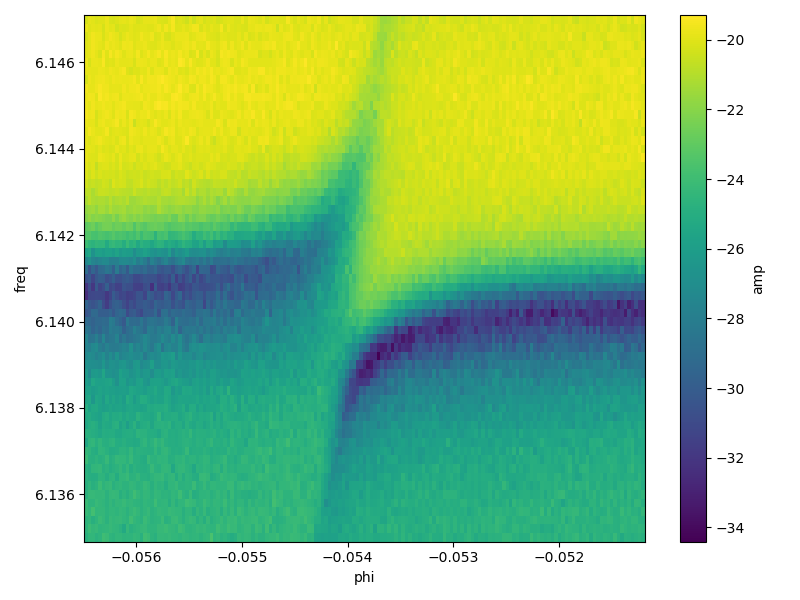

In [ ]:
plot3D(
    data_dict=data['sts_flux_zoom'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
)
plt.show()

### Resonance fluctiation pt2

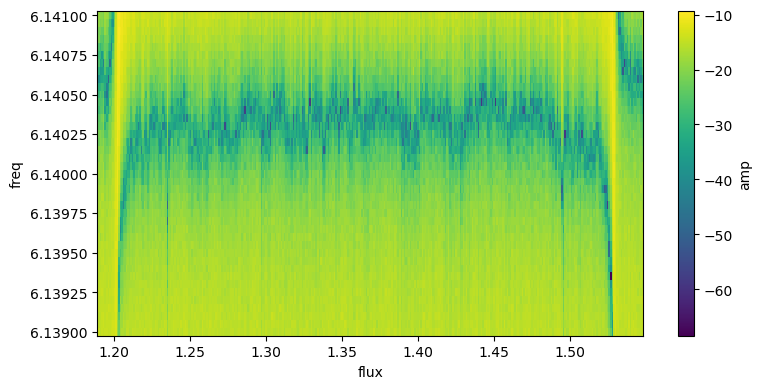

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
plot3D(
    data_dict=data['res_fluq'],
    x_key='flux',
    y_key='freq',
    z_key='amp',
    ax=ax,
    fig=fig
)
plt.show()

# Two tone spectroscopy

## Fixing first tone

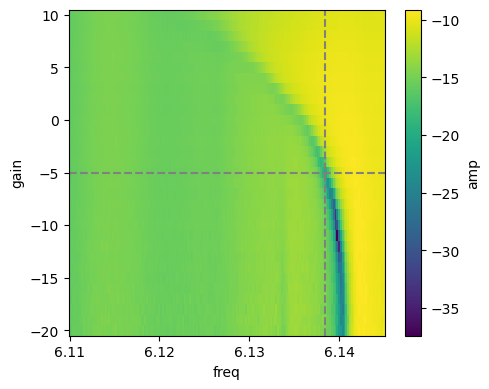

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
plot3D(
    data_dict=data['sts_power'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax,
    fig=fig,
)
ax.axhline(y=-5,linestyle='dashed', color='gray')
ax.axvline(x=data['sts_power']['freq'][0,142],linestyle='dashed', color='gray')
plt.show()

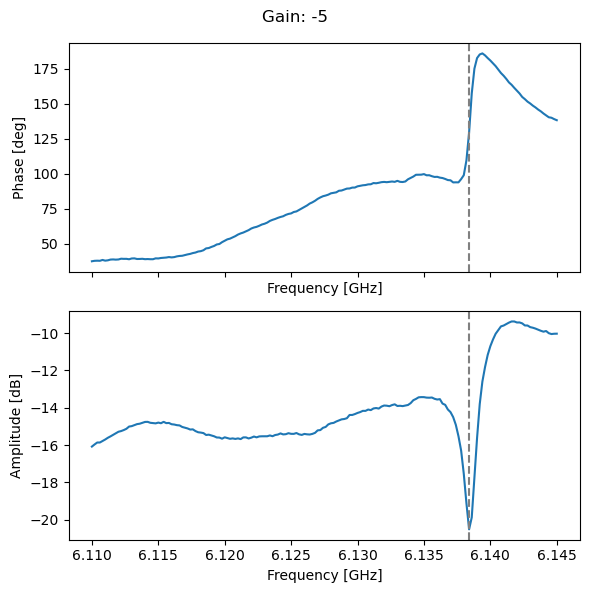

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(2,1,sharex=True, figsize=(6,6))
fig.suptitle('Gain: -5')
idx = np.where(data['sts_power']['gain'] == -5)[0][0]
ax[0].plot(data['sts_power']['freq'][idx,:], data['sts_power']['phase'][idx,:])
ax[0].set_xlabel('Frequency [GHz]')
ax[0].set_ylabel('Phase [deg]')
ax[1].plot(data['sts_power']['freq'][idx,:], data['sts_power']['amp'][idx,:])
ax[1].set_xlabel('Frequency [GHz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[0].axvline(x=data['sts_power']['freq'][0,142],linestyle='dashed', color='gray')
ax[1].axvline(x=data['sts_power']['freq'][0,142],linestyle='dashed', color='gray')
fig.tight_layout()
plt.show()

## Map

In [7]:
voltage_period = 3.033
zero_flux = 1.3668

tts_dict = {key: data[key] for key in ['tts_upper','tts_lower','tts_left'] if key in data}

for key in ['tts_upper','tts_lower','tts_left']:
    tts_dict[key]['phi'] = (tts_dict[key]['flux']-zero_flux)/voltage_period
data['tts_zero']['phi'] = (data['tts_zero']['flux']-zero_flux)/voltage_period

In [8]:
fluxonium = sq.Fluxonium(EJ=10.013,EC=1.588,EL=0.3678, flux=0, cutoff=40)
flux_array1 = np.linspace(-0.5,0,3001)
fluxspec = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=flux_array1,
    evals_count=6,
    subtract_ground=False
)

evals_matrix = fluxspec.energy_table
transitions0 = evals_matrix - evals_matrix[:,0].reshape(-1,1)
transitions1 = evals_matrix - evals_matrix[:,1].reshape(-1,1)
transitions2 = evals_matrix - evals_matrix[:,2].reshape(-1,1)

transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)

flux_array2 = np.linspace(data['tts_zero']['phi'].min(),data['tts_zero']['phi'].max(),201)
fluxspec2 = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=flux_array2,
    evals_count=3,
    subtract_ground=False
)

evals_matrix2 = fluxspec2.energy_table
transitions0_2 = evals_matrix2 - evals_matrix2[:,0].reshape(-1,1)

transitions0_2 = np.delete(transitions0_2,0,axis=1)


Spectral data:   0%|          | 0/3001 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

In [9]:
flux_array = np.linspace(-0.5, 0.5, 501)
fluxspec = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=flux_array,
    evals_count=6,
    subtract_ground=False
)
evals_matrix = fluxspec.energy_table

Spectral data:   0%|          | 0/501 [00:00<?, ?it/s]

Text(0.5, 0, '$\\Phi/\\Phi_0$')

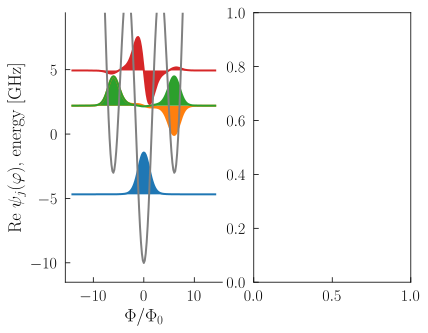

In [10]:
latex_style(True)
fig, ax = plt.subplots(1,2)
fluxonium.plot_wavefunction(which=[0,1,2,3], scaling=0.5, fig_ax=(fig,ax[0]))
ax[0].set_xlabel(r'$\Phi/\Phi_0$')

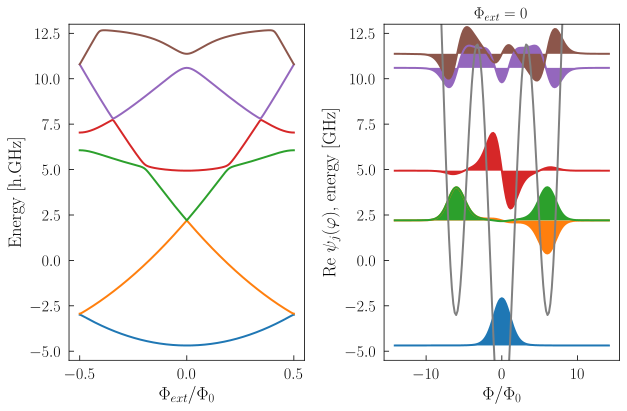

In [11]:
fig, ax = plt.subplots(1,2, figsize=(9,6), sharey= True)
ax[0].plot(flux_array, evals_matrix[:,:6])
ax[0].set_xlabel(r'$\Phi_{ext}/\Phi_0$')
ax[0].set_ylabel(r'Energy [h.GHz]')
ax[0].set_ylim([-5.5,13])

fluxonium.plot_wavefunction(which=[0,1,2,3,4,5], scaling=0.4, fig_ax=(fig,ax[1]))
for spine in ax[1].spines.values():
        spine.set_visible(True)
ax[1].set_xlabel(r'$\Phi/\Phi_0$')
ax[1].set_ylim([-5.5,13])
ax[1].set_title(r'$\Phi_{ext} = 0$')
fig.tight_layout()
plt.show()

This data below is done by doing a simultaneous driving of the qubit and the resonator and that includes photons in the resonator, so we must fit without a simultaneous driving

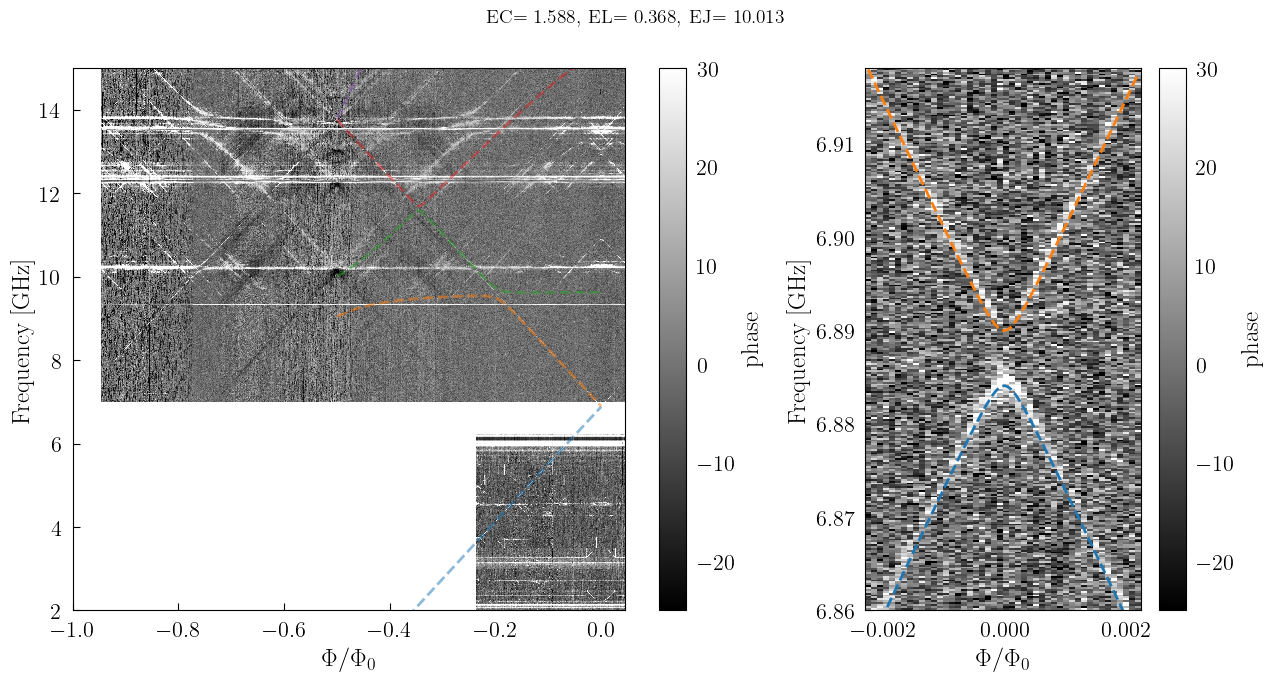

In [ ]:
%matplotlib inline
latex_style(True)
fig,ax = plt.subplots(1,2, figsize=(13,7), gridspec_kw={'width_ratios': [2, 1]})
fig.suptitle(f'EC= {np.round(fluxonium.EC,3)}, EL= {np.round(fluxonium.EL,3)}, EJ= {np.round(fluxonium.EJ,3)}', fontsize=14)

plot3Ds(
    data_dicts=tts_dict,
    x_key='phi',
    y_key='freq',
    z_key='phase',
    flatten_vertical=1,
    flatten_horizontal=0,
    ax=ax[0],
    fig=fig,
    vmin=-25,
    vmax=30,
    cmap='gray'
)

plot3D(
    data_dict=data['tts_zero'],
    x_key='phi',
    y_key='freq',
    z_key='phase',
    ax=ax[1],
    flatten_vertical=1,
    fig=fig,
    vmin=-25,
    vmax=30,
    cmap='gray',
)

ax[0].plot(flux_array1,transitions0, alpha=0.5,linestyle='dashed',linewidth=2)
# ax[0].plot(flux_array1,transitions1, alpha=0.5,color='C1',linestyle='dashed',linewidth=0.8)
ax[0].set_xlim(left=-1)
ax[0].set_ylim([2,15])


ax[1].plot(flux_array2,transitions0_2, alpha=1,linestyle='--',linewidth=2)
ax[1].set_ylim(bottom=6.86)


ax[0].set_xlabel(r'$\Phi/\Phi_0$')
ax[0].set_ylabel(r'Frequency [GHz]')
ax[1].set_xlabel(r'$\Phi/\Phi_0$')
ax[1].set_ylabel(r'Frequency [GHz]')
plt.tight_layout()
plt.show()

## Fit without simultaneous driving

In [15]:
datapath = "/Users/joancaceres/Documents/FERBO/FBW10S4/Run2 [BFr8]/Two_tone_spectro_vs_flux/20240721160630_Two_tone_spectro_vs_flux.hdf5"

data = dict()
with h5py.File(datapath, 'r') as f:
    for key in f.keys():
        data[key] = f[key][:]

In [16]:
p0 = {
    'x01' : 6.881,
    'gamma1': 1e-3,
    'a1': data['phase'][0].max() - data['phase'][0].min(),
    'x02' : 6.894,
    'gamma2': 1e-3,
    'a2': data['phase'][0].max() - data['phase'][0].min(),
    'baseline': data['phase'][0].min()
        }

initial_guess = list(p0.values())
        
bounds = {
    "x01": (data['freq'].min()*1e-9, data['freq'].max()*1e-9),
    "gamma1": (0, np.inf),
    "a1": (10, np.inf),
    "x02": (data['freq'].min()*1e-9, data['freq'].max()*1e-9),
    "gamma2": (0, np.inf),
    "a2": (10, np.inf),
    "baseline": (data['phase'][0].min(), data['phase'][0].max())
}

lower_bounds = [bounds[key][0] for key in bounds.keys()]
upper_bounds = [bounds[key][1] for key in bounds.keys()]
bounds = (lower_bounds, upper_bounds)

fitting_params, fitting_errors = list(), list()

for idx, flux in enumerate(data['flux']):
    try:
        popt, pcov = curve_fit(
            f = double_lorentzian,
            xdata=data['freq']*1e-9,
            ydata= data['phase'][idx],
            p0= initial_guess,
            bounds=bounds,
            )
        
        initial_guess = popt
        fitting_params.append(popt)
        fitting_errors.append(np.diag(np.sqrt(pcov)))
    except:
        print(f"error in index {idx}")
        # initial_guess = list(p0.values())
        fitting_params.append([np.nan]*len(p0))
        fitting_errors.append([np.nan]*len(p0))
        
    
    
fitting_params = np.array(fitting_params)
fitting_errors = np.array(fitting_errors)

 /var/folders/hj/vvh01wsx5sj4wtm490qj1zy80000gn/T/ipykernel_6796/1690362963.py: 41

In [ ]:
latex_style(0)
def update_plot(idx):
    # idx = 0
    fig,ax = plt.subplots(1,1)
    ax.plot(data['freq']*1e-9, data['phase'][idx])
    ax.plot(data['freq']*1e-9, double_lorentzian(data['freq']*1e-9, *fitting_params[idx]))
    fig.tight_layout()
    plt.show()
    
interact(update_plot, idx=IntSlider(min=0, max=data['flux'].shape[0]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='idx', max=13), Output()), _dom_classes=('widget-interact…

<function __main__.update_plot(idx)>

In [17]:
voltage_period = 3.033
center_voltage = data['flux'][fitting_params[:,0].argmax()]
phase = (data['flux']-center_voltage)/voltage_period

center_voltage = data['flux'][fitting_params[:,0].argmax()]
transition01 = fitting_params[:,0]
transition02 = fitting_params[:,3]

bounds = {
    'EJ': (9, 15),  # Limites para EJ
    'EC': (0.5, 2),   # Limites para EC
    'EL': (0.1, 0.9)      # Limites para EL
}

fit_fluxonium2(
    transition_data= [
        (np.column_stack((phase, transition01)), 0, 1),
        (np.column_stack((phase, transition02)), 0, 2),
        ],
    bounds= bounds
)

Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

(Fluxonium(**{'EJ': 11.48130161545643, 'EC': 1.9522835188313217, 'EL': 0.3655880632880296, 'flux': 0, 'cutoff': 40, 'truncated_dim': 6, 'id_str': 'Fluxonium_2812', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None}),
  message: Optimization terminated successfully.
  success: True
      fun: 2.216852091017193e-05
        x: [ 4.136e-01  9.682e-01  3.320e-01]
      nit: 60
     nfev: 2809
      jac: [ 2.684e-05 -2.693e-05  1.312e-03])

$E_J= 10.507\quad E_C = 1.706\quad E_L= 0.367$

Spectral data:   0%|          | 0/14 [00:00<?, ?it/s]

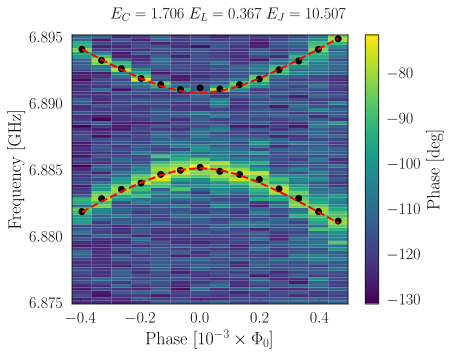

In [18]:
fluxonium_params = {
    'EC': 1.706,
    'EL': 0.367,
    'EJ': 10.507,
}

fluxonium = sq.Fluxonium(**fluxonium_params, flux=0, cutoff=40)
spectrum = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=phase,
    evals_count=3,
    subtract_ground=True
)

spectrum_table = spectrum.energy_table

FLUX, FREQ = np.meshgrid(phase*1e3, data['freq']*1e-9)
fig, ax = plt.subplots(1,1)
fig.suptitle(rf"$E_C = {fluxonium_params['EC']}\; E_L = {fluxonium_params['EL']}\; E_J = {fluxonium_params['EJ']}$")
c = ax.pcolormesh(FLUX, FREQ, data['phase'].T)
fig.colorbar(c, label = 'Phase [deg]')
ax.plot(phase*1e3, fitting_params[:,0], 'o', color='black')
ax.plot(phase*1e3, fitting_params[:,3], 'o', color='black')
ax.plot(phase*1e3, spectrum_table[:,1], '--', color='red')
ax.plot(phase*1e3, spectrum_table[:,2], '--', color='red')


ax.set_xlabel(r'Phase [$ 10^{-3} \times \Phi_0$]')
ax.set_ylabel('Frequency [GHz]')
plt.show()

## Observations

### Double levels

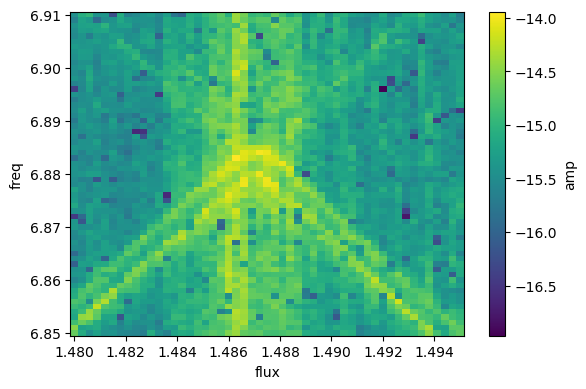

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plot3D(
    data_dict=data['tts_double'],
    x_key='flux',
    y_key='freq',
    z_key='amp',
    ax=ax,
    flatten_vertical=0,
    fig=fig
)
plt.show()

### Flux drifting

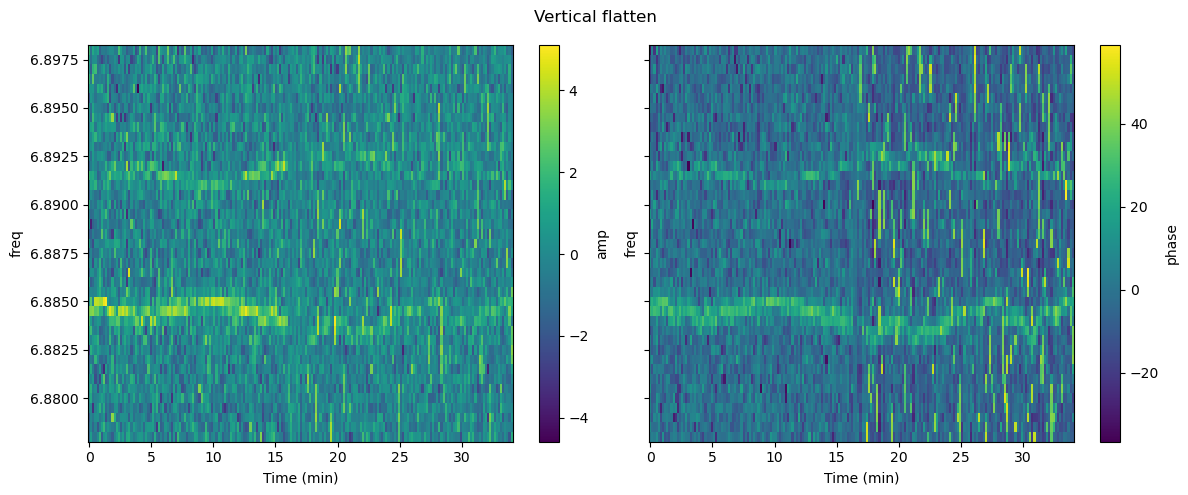

In [ ]:
data['flux_drifting']['time'] = np.linspace(0,34,200)

fig, ax = plt.subplots(1,2,figsize=(12,5), sharey=True)
fig.suptitle('Vertical flatten')
plot3D(
    data_dict=data['flux_drifting'],
    x_key='time',
    y_key='freq',
    z_key='amp',
    ax=ax[0],
    flatten_vertical=1,
    fig=fig
)

plot3D(
    data_dict=data['flux_drifting'],
    x_key='time',
    y_key='freq',
    z_key='phase',
    ax=ax[1],
    flatten_vertical=1,
    fig=fig
)
ax[0].set_xlabel('Time (min)')
ax[1].set_xlabel('Time (min)')
plt.show()

# Time domain measurements

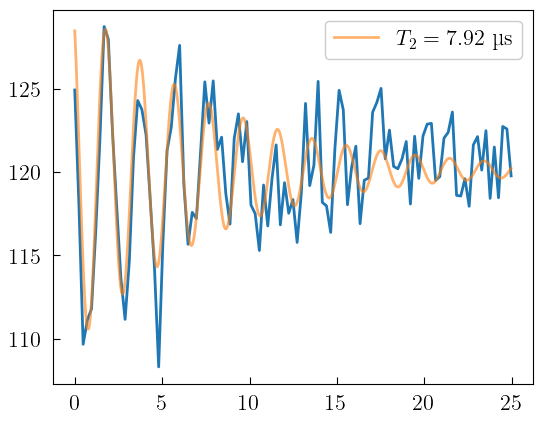

In [ ]:
def rabi_func(x, A0, A1, A2, w_R, TR):
    return A0 + A1 * np.cos(w_R * x + A2) * np.exp(-x / TR)

def T1_func(x, A0, A1, T1):
    return A0 + A1 * np.exp(-x / T1)

def ramsey_func(x, A0, A1, A2, w_qd, T2):
    return A0 + A1 * np.cos(w_qd*x+A2)*np.exp(-x/T2)

popt_rabi, pcov_rabi = curve_fit(rabi_func, data['rabi']['pulse_length_ns'], data['rabi']['amp'], p0=(-22.2, 0.7, np.pi, 2*np.pi/150,1000))
popt_t1, pcov_t1 = curve_fit(T1_func, data['t1']['param']/1e3, data['t1']['amp'], p0=(-22.6, -0.7, 100))
popt_t2, pcov_t2 = curve_fit(ramsey_func, data['ramsey']['delay_ns']/1e3, data['ramsey']['amp'], p0=(-21.75, 0.8, 0,np.pi, 3))

hahn_echo_data = load_data(filedirectory+str(427415))
i=2
x = hahn_echo_data['delay_ns'][i,:]*1e-3
x_interpol = np.linspace(x.min(),x.max(), 1000)
y = hahn_echo_data['phase'][i,:]
popt_echo, pcov_echo = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)/2))

fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.plot(x_interpol,ramsey_func(x_interpol,*popt_echo), alpha=0.6,label=rf'$T_2 = {np.round(popt_echo[-1],2)}$ µs')
ax.legend()
plt.show()

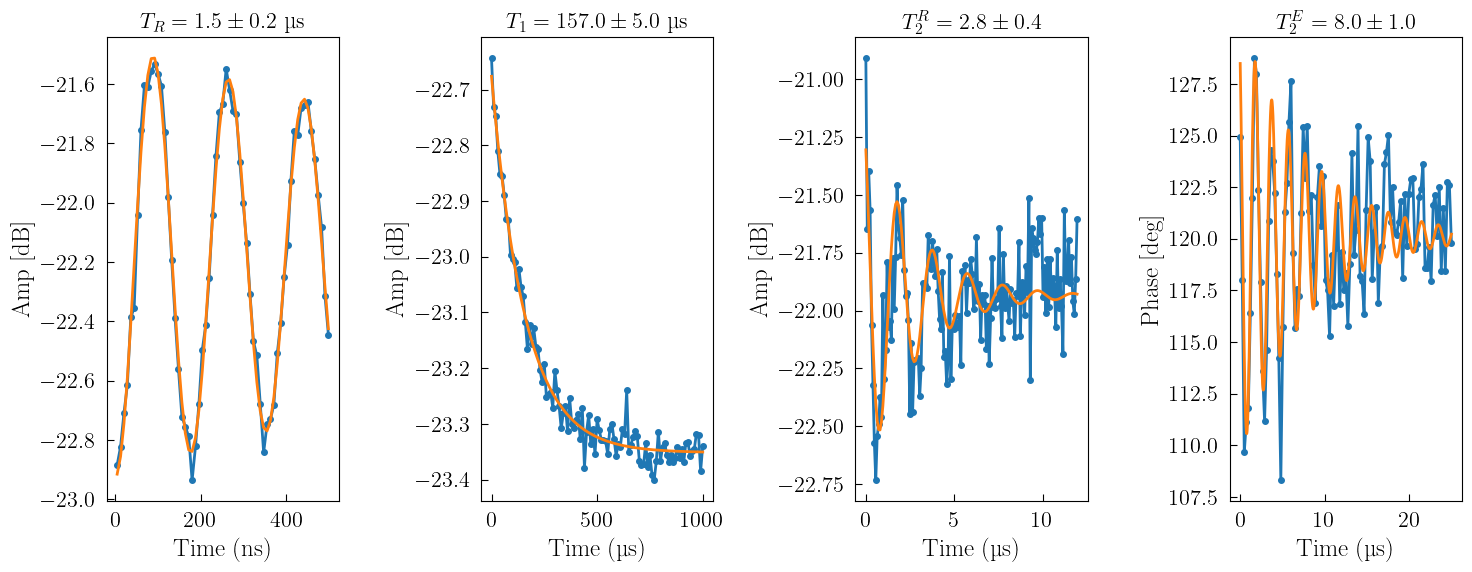

In [ ]:
fig,ax = plt.subplots(1,4, figsize=(15,6))
ax[0].plot(data['rabi']['pulse_length_ns'], data['rabi']['amp'],'o-',markersize=4)
ax[0].plot(data['rabi']['pulse_length_ns'], rabi_func(data['rabi']['pulse_length_ns'],*popt_rabi))
ax[0].set_title(rf"$T_R= {np.round(popt_rabi[-1]/1e3,1)} \pm {np.round(np.sqrt(pcov_rabi[-1,-1])/1e3,1)}$ µs")
ax[0].set_xlabel('Time (ns)')
ax[0].set_ylabel('Amp [dB]')

ax[1].plot(data['t1']['param']/1e3, data['t1']['amp'],'o-',markersize=4)
ax[1].plot(data['t1']['param']/1e3, T1_func(data['t1']['param']/1e3,*popt_t1))
ax[1].set_title(rf"$T_1= {np.round(popt_t1[2],0)} \pm {np.round(np.sqrt(pcov_t1[2,2]),0)}$ µs")
ax[1].set_xlabel('Time (µs)')
ax[1].set_ylabel('Amp [dB]')

ax[2].plot(data['ramsey']['delay_ns']/1e3, data['ramsey']['amp'],'o-',markersize=4)
ax[2].plot(data['ramsey']['delay_ns']/1e3, ramsey_func(data['ramsey']['delay_ns']/1e3,*popt_t2))
ax[2].set_title(rf"$T_2^R= {np.round(popt_t2[-1],1)} \pm {np.round(np.sqrt(pcov_t2[-1,-1]),1)}$")
ax[2].set_xlabel('Time (µs)')
ax[2].set_ylabel('Amp [dB]')

i=2
x_interpol = np.linspace(hahn_echo_data['delay_ns'][i,:].min()/1e3,hahn_echo_data['delay_ns'][i,:].max()/1e3, 1000)
ax[3].plot(hahn_echo_data['delay_ns'][i,:]/1e3, hahn_echo_data['phase'][i,:],'o-',markersize=4)
ax[3].plot(x_interpol, ramsey_func(x_interpol,*popt_echo))
ax[3].set_title(rf"$T_2^E= {np.round(popt_echo[-1],0)} \pm {np.round(np.sqrt(pcov_echo[-1,-1]),0)}$")
ax[3].set_xlabel('Time (µs)')
ax[3].set_ylabel('Phase [deg]')

fig.tight_layout()
plt.show()

## Rabi Chevron

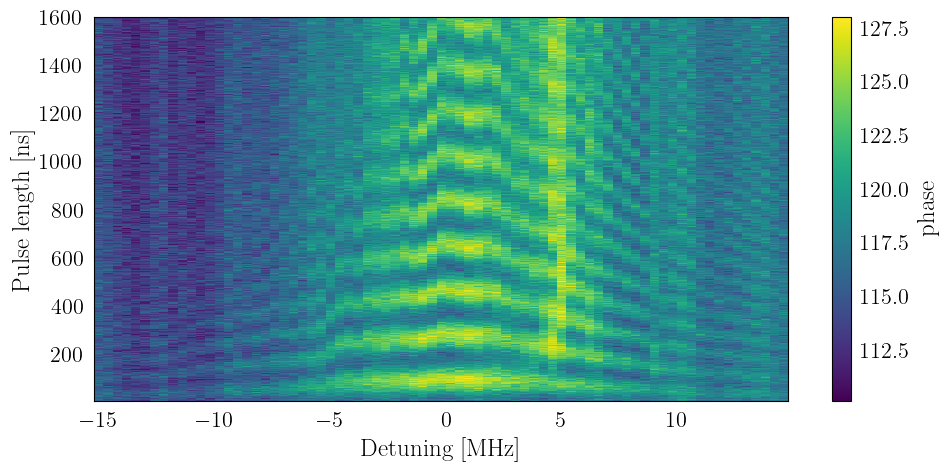

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(10,5))

plot3D(
    data_dict=data['rabi_chevron'],
    x_key='detuning',
    y_key='pulse_length_ns',
    z_key='phase',
    ax=ax,
    flatten_vertical=0,
    fig=fig
)

ax.set_xlabel('Detuning [MHz]')
ax.set_ylabel('Pulse length [ns]')

fig.tight_layout()
plt.show()

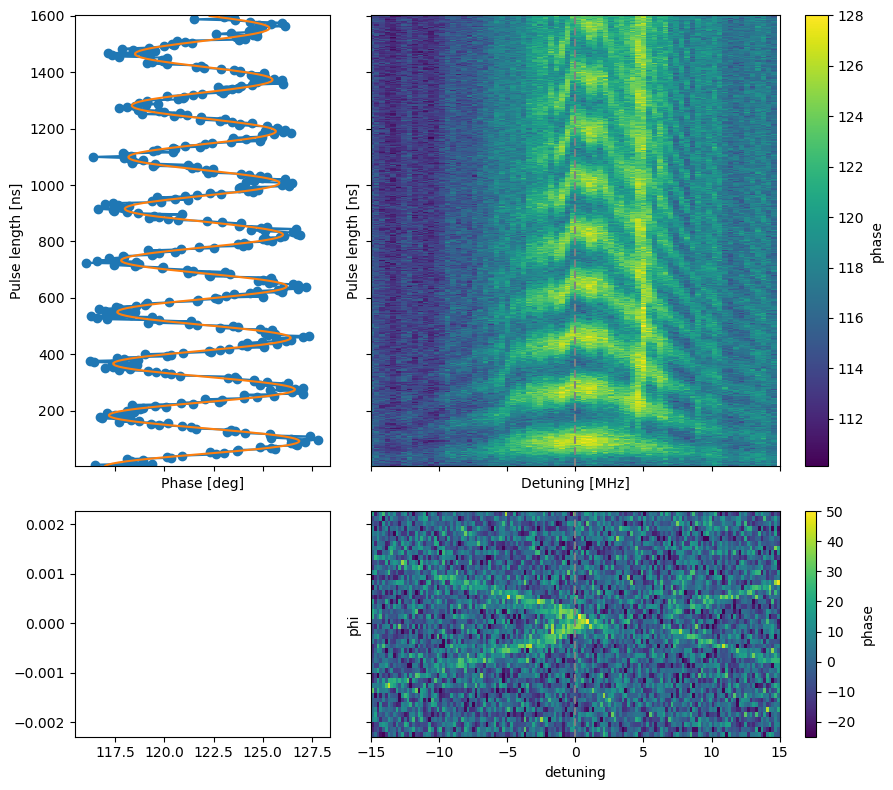

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(9,8),sharex='col', sharey='row', gridspec_kw={'width_ratios': [1, 2], 'height_ratios': [2, 1]})

zero_idx = 40
popt_rabi_chevron, pcov_rabi_chevron = curve_fit(rabi_func, data['rabi_chevron']['pulse_length_ns'][0], data['rabi_chevron']['phase'][zero_idx], p0=(102, 4, np.pi, 2*np.pi/150,1000))


ax[0,0].plot(data['rabi_chevron']['phase'][zero_idx], data['rabi_chevron']['pulse_length_ns'][0], 'o-')
ax[0,0].plot(rabi_func(data['rabi_chevron']['pulse_length_ns'][0],*popt_rabi_chevron), data['rabi_chevron']['pulse_length_ns'][0])

plot3D(
    data_dict=data['rabi_chevron'],
    x_key='detuning',
    y_key='pulse_length_ns',
    z_key='phase',
    ax=ax[0,1],
    flatten_vertical=0,
    fig=fig
)

ax[0, 1].sharey(ax[0, 0])

data['tts_zero']['detuning'] = (data['tts_zero']['freq'] - 6.8843)*1e3
plot3D(
    data_dict=data['tts_zero'],
    x_key='detuning',
    y_key='phi',
    z_key='phase',
    ax=ax[1,1],
    flatten_horizontal=1,
    fig=fig,
    vmin=-25,
    vmax=50,
    cmap='viridis',
)

ax[1,1].set_xlim([data['rabi_chevron']['detuning'].min(),15])
ax[0,1].axvline(x=0, color='gray', linestyle='dashed')
ax[1,1].axvline(x=0, color='gray', linestyle='dashed')
ax[0,1].set_xlabel('Detuning [MHz]')
ax[0,1].set_ylabel('Pulse length [ns]')
ax[0,0].set_xlabel('Phase [deg]')
ax[0,0].set_ylabel('Pulse length [ns]')

plt.show()

## Ramsey fringes

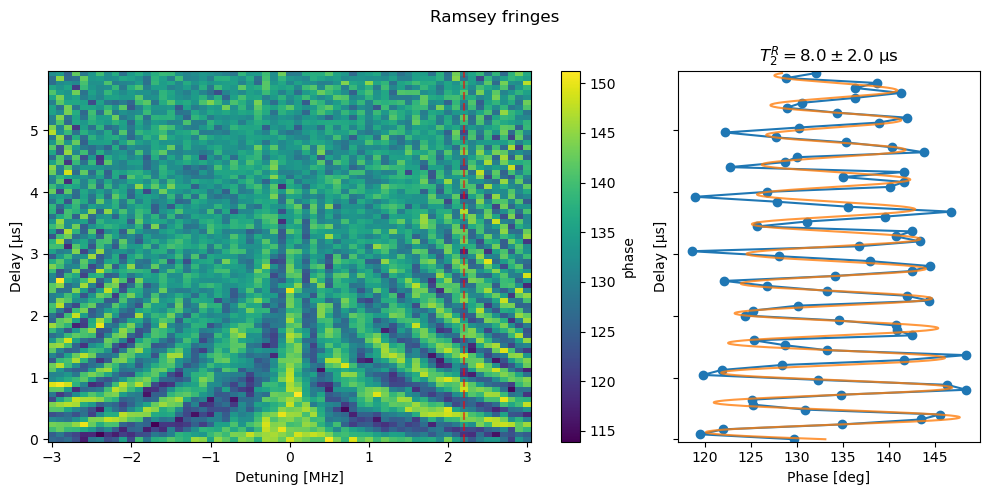

In [ ]:
ramsey_fringes = load_data(filedirectory+str(430723))
ramsey_fringes['detuning'] = ramsey_fringes['detuning']*1e-6
ramsey_fringes['delay_ns'] = ramsey_fringes['delay_ns']*1e-3

idx = -9
x = ramsey_fringes['delay_ns'][idx]
y = ramsey_fringes['phase'][idx]
x_interpol = np.linspace(x.min(), x.max(),1001)
popt_ramsey, pcov_ramsey = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)/5))


fig,ax = plt.subplots(1,2, figsize=(10,5), sharey = True, gridspec_kw={'width_ratios': [2,1]})
ax[1].plot(ramsey_fringes['phase'][idx], x, 'o-')
ax[1].plot(ramsey_func(x_interpol,*popt_ramsey),x_interpol, alpha=0.8)

plot3D(
    data_dict=ramsey_fringes,
    x_key='detuning',
    y_key='delay_ns',
    z_key='phase',
    fig=fig,
    ax=ax[0]
)
ax[0].axvline(x = ramsey_fringes['detuning'][idx], color='red',linestyle='dashed', alpha = 0.6)
ax[1].set_xlabel('Phase [deg]')
ax[1].set_ylabel('Delay [µs]')
ax[0].set_ylabel('Delay [µs]')
fig.suptitle('Ramsey fringes')
ax[0].set_xlabel('Detuning [MHz]')
ax[1].set_title(rf'$T_2^R = {np.round(popt_ramsey[-1],0)} \pm {np.round(np.sqrt(pcov_ramsey[-1,-1]),0)}$ µs')

fig.tight_layout()
plt.show()

In [ ]:
ramsey_np_avg = load_data(filedirectory+str(431347))
length = len(ramsey_np_avg['phase'])
print(length)

def plot_with_avg(avg):
    phase_avg = np.mean(ramsey_np_avg['phase'][(length - avg):], 0)
    # phase_avg = np.mean(ramsey_np_avg['phase'][:avg], 0)
    fig, ax = plt.subplots(1, 1)
    ax.plot(ramsey_np_avg['delay_ns'][0], phase_avg)
    ax.set_ylim([100,150])
    plt.show()

# Crear el widget interactivo
interact(plot_with_avg, avg=IntSlider(min=1, max=length, step=1))

441


interactive(children=(IntSlider(value=1, description='avg', max=441, min=1), Output()), _dom_classes=('widget-…

<function __main__.plot_with_avg(avg)>

## Hahn echo

In [ ]:
hahn_echo_data = load_data(filedirectory+str(427415))

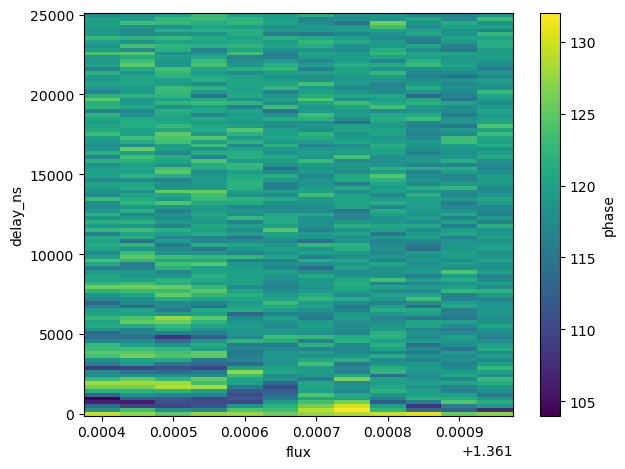

In [ ]:
fig,ax = plt.subplots(1,1)

plot3D(
    data_dict=hahn_echo_data,
    x_key='flux',
    y_key='delay_ns',
    z_key='phase',
    flatten_vertical=0,
    fig=fig,
    ax=ax
)
plt.show()

In [ ]:
def ramsey_func(x, A0, A1, A2, w_qd, T2):
    return A0 + A1 * np.cos(w_qd*x+A2)*np.exp(-x/T2)

popt_echo_list = []
pcov_echo_list = []

for i in range(len(hahn_echo_data['flux'])):
    x = hahn_echo_data['delay_ns'][i,:]*1e-3
    y = hahn_echo_data['phase'][i,:]
    popt_echo, pcov_echo = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)))
    popt_echo_list.append(popt_echo)
    pcov_echo_list.append(pcov_echo)
    
popt_echo_list = np.array(popt_echo_list)
pcov_echo_list = np.array(pcov_echo_list)

In [ ]:
popt_echo_list[:,-1]

array([ 4.28622394e+00,  5.57592488e+00, -2.63578083e+04,  5.27616355e+00,
       -1.25735303e+06,  1.88941001e+00,  3.33265887e-01,  1.54329053e+00,
        1.33411980e+00,  4.27300799e+01, -4.42243430e+05, -4.30762836e+06])

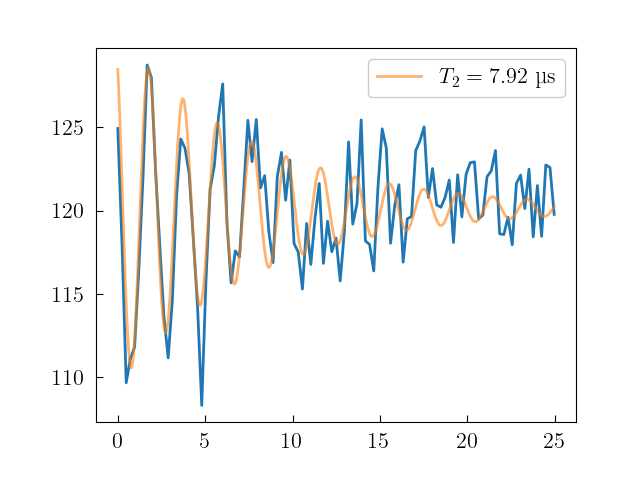

In [ ]:
i=2
x = hahn_echo_data['delay_ns'][i,:]*1e-3
x_interpol = np.linspace(x.min(),x.max(), 1000)
y = hahn_echo_data['phase'][i,:]
popt_echo, pcov_echo = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)/2))

fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.plot(x_interpol,ramsey_func(x_interpol,*popt_echo), alpha=0.6,label=rf'$T_2 = {np.round(popt_echo[-1],2)}$ µs')
ax.legend()
plt.show()

In [ ]:
np.sqrt(pcov_echo[-1,-1])

1.2332220164815006

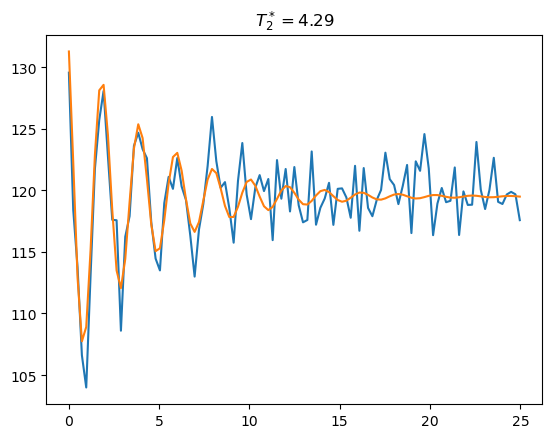

In [ ]:
fig,ax = plt.subplots(1,1)
# ax.set_title(rf'$T_2^* = {np.round(popt_echo[-1], 2)}$')
ax.plot(x, hahn_echo_data['phase'][0,:])
ax.plot(x, ramsey_func(x,*popt_echo))
plt.show()

# Noise characterization

In [ ]:
# Leer datos del archivo HDF5
file = "/Users/joancaceres/Documents/FERBO/FBW10S4/Run2 [BFr8]/Continuous_Flux_Sweep/20240726233526__Continuous_Flux_Sweep.hdf5"
data, attrs = dict(), dict()

with h5py.File(file, 'r') as f:
    for key in f.attrs.keys():
        attrs[key] = f.attrs[key]
        
    for key in f.keys():
        data[key] = f[key][:]

# Parámetros iniciales y límites para el ajuste en formato de diccionario
initial_guess = {
    "x01": -1.159,
    "gamma1": 0.8e-3,
    "a1": 15e-3,
    "x02": -1.156,
    "gamma2": 0.8e-3,
    "a2": 12e-3,
    "baseline": -0.0550
}

bounds = {
    "x01": (data['flux'].min(), data['flux'].max()),
    "gamma1": (0, np.inf),
    "a1": (0, np.inf),
    "x02": (data['flux'].min(), data['flux'].max()),
    "gamma2": (0, np.inf),
    "a2": (0, np.inf),
    "baseline": (-0.06, -0.045)
}

p0 = list(initial_guess.values())
lower_bounds = [bounds[key][0] for key in initial_guess.keys()]
upper_bounds = [bounds[key][1] for key in initial_guess.keys()]
bounds = (lower_bounds, upper_bounds)

# Ajuste de los datos y cálculo de parámetros ajustados y errores
fitted_params = []
fitted_errors = []

for idx in range(data['Q'].shape[0]):
    try:
        popt, pcov = curve_fit(double_lorentzian, data['flux'], data['Q'][idx, :], 
                               p0=p0, bounds=bounds)
        fitted_params.append(popt)
        fitted_errors.append(np.sqrt(np.diag(pcov)))
        p0 = popt  # Actualizar p0 con los parámetros ajustados actuales
    except RuntimeError:
        print(f"Error en el ajuste para idx={idx}")
        fitted_params.append([np.nan] * 7)
        fitted_errors.append([np.nan] * 7)

# Convertir las listas a arrays
fitted_params = np.array(fitted_params)
fitted_errors = np.array(fitted_errors)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,5))
%matplotlib inline
TIME, FLUX = np.meshgrid(data['time']/3600, data['flux'])
c = ax.pcolormesh(TIME, FLUX, (data['Q']*1e3).T, shading='auto')
fig.colorbar(c, label='Q [mV]')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Voltage [V]')
fig.tight_layout()
plt.show()

Showing the fit for each time to see if it's correct

In [ ]:
%matplotlib inline
def update_plot(idx):
    fig, ax = plt.subplots(1, 1)
    ax.plot(data['flux'], data['Q'][idx, :], label='Datos')

    # Usar los parámetros ajustados previamente
    popt = fitted_params[idx]
    perr = fitted_errors[idx]

    # Verificar si hay NaN en los parámetros ajustados
    if np.isnan(popt).any():
        print(f"Error en el ajuste para idx={idx}")
        ax.set_title(f'Error en el ajuste para idx={idx}')
    else:
        flux_interp = np.linspace(np.min(data['flux']), np.max(data['flux']), 500)
        ax.plot(flux_interp, double_lorentzian(flux_interp, *popt), label='Ajuste', color='red')

        # Mostrar los parámetros ajustados y sus errores en la gráfica
        param_text = '\n'.join([f'{param:.3e} ± {error:.3e}' for param, error in zip(popt, perr)])
        ax.text(0.05, 0.95, param_text, transform=ax.transAxes, fontsize=8, verticalalignment='top')

    ax.set_xlabel('Flux')
    ax.set_ylabel('Q')
    ax.set_ylim([data['Q'].min(), data['Q'].max()])
    ax.set_title(f'Ajuste de Lorentzianas para idx={idx}')
    ax.legend()
    plt.show()

# Crear la barra deslizante
interact(update_plot, idx=IntSlider(min=0, max=data['Q'].shape[0]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='idx', max=3060), Output()), _dom_classes=('widget-intera…

<function __main__.update_plot(idx)>

Spectrum in time and frequency domain

In [ ]:
fluxonium_params = {
    'EC': 1.706,
    'EL': 0.367,
    'EJ': 10.507,
}

fluxonium = sq.Fluxonium(**fluxonium_params, flux=0, cutoff=40)
spectrum = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=phase,
    evals_count=3,
    subtract_ground=True
)

sweep_freq = 6.885

NameError: name 'calculate_fft' is not defined

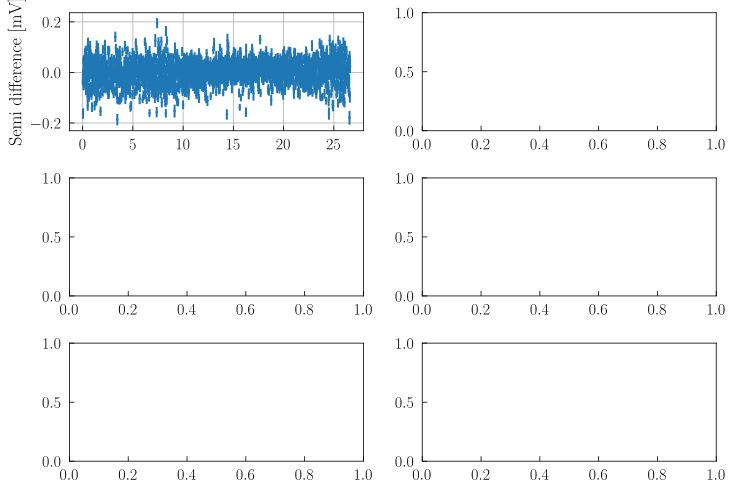

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
markersize = 3
cutoff = 2335

# Definir variables y etiquetas
y_data_list = [
    (fitted_params[:cutoff, 3] - fitted_params[:cutoff, 0]) / 2 * 1e3,
    (fitted_params[:cutoff, 3] + fitted_params[:cutoff, 0]) / 2 / voltage_period,
    fitted_params[:cutoff, -1] * 1e3
]
y_err_list = [
    (fitted_errors[:cutoff, 3] + fitted_errors[:cutoff, 0]) / 2 * 1e3,
    (fitted_errors[:cutoff, 3] + fitted_errors[:cutoff, 0]) / 2 / voltage_period,
    fitted_errors[:cutoff, -1] * 1e3
]
y_labels = ['Semi difference [mV]', r'Phase center [$ 10^{-3} \Phi_0$]', 'Baseline [mV]']
fft_labels = ['FFT amplitude [mV/Hz]', r'FFT amplitude [$\Phi_0$/Hz]', 'FFT amplitude [mV/Hz]']

# Primer conjunto de gráficos
y_data_0 = y_data_list[0]
y_data_phase_0 = y_data_0 - np.nanmean(y_data_0)

# Serie temporal
axes[0, 0].errorbar(data['time'][:cutoff] / 3600, y_data_phase_0,
                    yerr=y_err_list[0], fmt='.', markersize=markersize)
axes[0, 0].set_ylabel(y_labels[0])
axes[0, 0].grid(True)

# FFT
frequencies_0, fft_amplitude_0 = calculate_fft(y_data_phase_0, data['time'][:cutoff])
axes[0, 1].plot(frequencies_0[1:], fft_amplitude_0[1:], '.', label='FFT data')

# Ajuste 1/f^alpha
popt_0, perr_0 = fit_power_law(frequencies_0[1:], fft_amplitude_0[1:])
fit_amplitude_0 = power_law(frequencies_0[1:], *popt_0)
alpha_0, c_0 = popt_0
alpha_err_0 = perr_0[0]
axes[0, 1].plot(frequencies_0[1:], fit_amplitude_0, 'r--', label=rf'Fit: $1/f^{{({alpha_0:.2f} ± {alpha_err_0:.2f})}}$')

axes[0, 1].set_ylabel(fft_labels[0])
axes[0, 1].set_yscale('log')
axes[0, 1].set_xscale('log')
axes[0, 1].grid(True)
axes[0, 1].legend()

# 2ND SET OF PLOTS
y_data_1 = y_data_list[1]
y_data_phase_1 = y_data_1 - np.nanmean(y_data_1)

# Serie temporal
axes[1, 0].errorbar(data['time'][:cutoff] / 3600, y_data_phase_1*1e3,
                    yerr=y_err_list[1], fmt='.', markersize=markersize)
axes[1, 0].set_ylabel(y_labels[1])
axes[1, 0].grid(True)

# FFT
frequencies_1, fft_amplitude_1 = calculate_fft(y_data_phase_1, data['time'][:cutoff])
axes[1, 1].plot(frequencies_1[1:], fft_amplitude_1[1:], '.', label='FFT data')

# Ajuste 1/f^alpha
popt_1, perr_1 = fit_power_law(frequencies_1[1:], fft_amplitude_1[1:])
fit_amplitude_1 = power_law(frequencies_1[1:], *popt_1)
alpha_1, c_1 = popt_1
alpha_err_1, c_err_1 = perr_1
axes[1, 1].plot(frequencies_1[1:], fit_amplitude_1, 'r--', label=rf'Fit: $({np.sqrt(c_1)*1e6:.0f} ± {np.sqrt(c_err_1)*1e6:.0f}) \times 10^{{-6}} /f^{{({alpha_1:.2f} ± {alpha_err_1:.2f})}}$')

axes[1, 1].set_ylabel(fft_labels[1])
axes[1, 1].set_yscale('log')
axes[1, 1].set_xscale('log')
axes[1, 1].grid(True)
axes[1, 1].legend()

# THIRD SET OF PLOTS
y_data_2 = y_data_list[2]
y_data_phase_2 = y_data_2

# Serie temporal
axes[2, 0].errorbar(data['time'][:cutoff] / 3600, y_data_phase_2,
                    yerr=y_err_list[2], fmt='.', markersize=markersize)
axes[2, 0].set_ylabel(y_labels[2])
axes[2, 0].grid(True)

# FFT
frequencies_2, fft_amplitude_2 = calculate_fft(y_data_phase_2, data['time'][:cutoff])
axes[2, 1].plot(frequencies_2[1:], fft_amplitude_2[1:], '.', label='FFT data')

# Ajuste 1/f^alpha
popt_2, perr_2 = fit_power_law(frequencies_2[1:], fft_amplitude_2[1:])
fit_amplitude_2 = power_law(frequencies_2[1:], *popt_2)
alpha_2, c_2 = popt_2
alpha_err_2 = perr_2[0]
axes[2, 1].plot(frequencies_2[1:], fit_amplitude_2, 'r--', label=rf'Fit: $A/f^{{({alpha_2:.2f} ± {alpha_err_2:.2f})}}$')

axes[2, 1].set_ylabel(fft_labels[2])
axes[2, 1].set_yscale('log')
axes[2, 1].set_xscale('log')
axes[2, 1].grid(True)
axes[2, 1].legend()

# Etiquetas del eje X
axes[2, 0].set_xlabel('Time [h]')
axes[2, 1].set_xlabel('Frequency [Hz]')

fig.tight_layout()
plt.show()

In [ ]:
latex_style(1)
markersize = 2
y_data_prev = (fitted_params[:cutoff, 3] + fitted_params[:cutoff, 0]) / 2 / voltage_period  # Data in \Phi_0 units
y_data = y_data_prev - (fitted_params[0, 3] + fitted_params[0, 0]) / 2 / voltage_period
# y_data = y_data_prev

positive_freqs, positive_psd = calculate_psd(y_data = y_data, x_data=data['time'][:cutoff])

idx=7
popt, perr = fit_power_law(positive_freqs[idx:], positive_psd[idx:])
fit_amplitude = power_law(positive_freqs[idx:], *popt)

fig, ax = plt.subplots(3,1, figsize=(9,9))
ax[0].set_title(rf"$A_{{\Phi_0}} = ({popt[1]*1e3:.3f} \pm {perr[1]*1e3:.3f})$ $m \Phi_0 / \sqrt{{Hz}}$,  $\gamma_{{\Phi_0}} = {popt[0]:.3f} \pm {perr[0]:.3f}$")
ax[0].plot(positive_freqs[1:],positive_psd[1:],'.-', markersize=markersize)
ax[0].plot(positive_freqs[idx:],fit_amplitude,'--', label = rf"Fit: $A_{{\Phi_0}}^2 \times \left(\frac{{1 Hz}}{{f}}\right)^{{\gamma_{{\Phi_0}}}}$")
ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel(r'PSD [$\Phi_0^2$ / Hz]')
ax[0].grid(True)

ax[1].plot(data['time'][:cutoff]/3600, autocorrelation(y_data)*1e6, '.', markersize=markersize)
ax[1].set_xlabel('Time [h]')
ax[1].set_ylabel(r'$\langle \Phi(t) \Phi(0) \rangle$ $\times 10^{{-6}}$')
ax[1].grid(True)

ax[2].plot(data['time'][:cutoff]/3600, y_data*1e3, '.', markersize=markersize)
ax[2].set_xlabel('Time [h]')
ax[2].set_ylabel(r'$\Phi(t) \times 10^{{-3}}$')
ax[2].grid(True)

fig.tight_layout()
plt.show()

NameError: name 'cutoff' is not defined

In [ ]:
def linear_function(x, A, B):
    return A + B * x

In [ ]:
# cutoff = 2335
cutoff = np.argmin(np.abs(data['time'] - 20*3600))
t = data['time'][:cutoff]
t = t - t[0]

phi = (fitted_params[:cutoff, 3] + fitted_params[:cutoff, 0]) / 2 / voltage_period  # Data in \Phi_0 units
phi_initial = (fitted_params[0, 3] + fitted_params[0, 0]) / 2 / voltage_period
phi_centered = phi - phi_initial

## FOURIER TRANSFORM
# Without interpolation.
dt = np.diff(t).mean()
fft_phi_centered = np.abs(np.fft.fft(a=phi_centered)) / len(t) # It's important to normalize it.
freq = np.fft.fftfreq(len(fft_phi_centered), dt)# Consider with the interpolation too.

n_points = len(phi_centered)//2 
freq = freq[1:n_points]
fft_phi_centered = fft_phi_centered[1:n_points]

psd = fft_phi_centered**2 /t[-1]
fit_resultFFT = fit_function_with_errors(func=linear_function, x=np.log(freq), y=np.log(psd))


from scipy.signal import periodogram, lombscargle

f, Pxx = periodogram(
    x=phi_centered,
    fs=1/dt,
    scaling='spectrum'
)

fit_result = fit_function_with_errors(func=linear_function, x=np.log(f[1:]), y=np.log(Pxx[1:]))

pgram = lombscargle(
    x=t,
    y=phi_centered,
    freqs=freq[1:n_points],
)

pgram = pgram / (2 * np.var(phi_centered) * len(t))

fit_result_jj = fit_function_with_errors(func=linear_function, x=np.log(freq[1:n_points]), y=np.log(pgram))


from astropy.timeseries import LombScargle

phi_error = (fitted_errors[:cutoff, 3] + fitted_errors[:cutoff, 0]) / 2 / voltage_period

lomb_scargle = LombScargle(
    t=t,
    y=phi_centered,
    # dy=phi_error,
    )
frequencyLS, powerLS = lomb_scargle.autopower(
    maximum_frequency=0.5/np.median(np.diff(t)),
    minimum_frequency=1/t[-1],
    # normalization='psd'
    )

psdLS = powerLS #* dt**2 /t[-1]
start = 0#np.abs(frequencyLS-1e-4).argmin()
end =  -1 #np.abs(frequencyLS-1e-2).argmin()
fit_resultLS = fit_function_with_errors(func=linear_function, x=np.log(frequencyLS[start:end]), y=np.log(psdLS[start:end]))

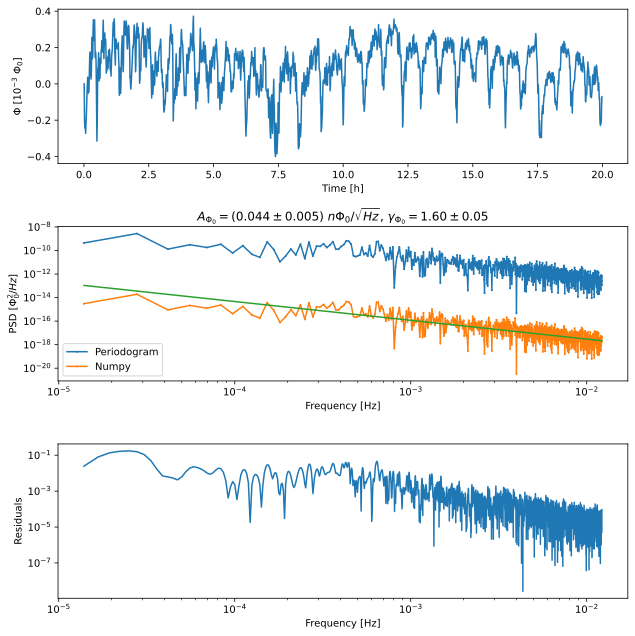

In [ ]:
latex_style(0)
fig, ax = plt.subplots(3,1, figsize=(9,9))
ax[0].plot(t/3600,phi_centered*1e3)
ax[0].set_xlabel('Time [h]')
ax[0].set_ylabel(r'$\Phi$ [$10^{{-3}}$ $\Phi_0$]')

# ax[1].plot(frequencyLS, psdLS, '.-', markersize = 2, label= 'Lomb-Scargle periodogram')
ax[1].plot(f[1:], Pxx[1:], '.-', markersize = 2, label = 'Periodogram')
ax[1].plot(freq, psd, '.-', markersize = 2, label = 'Numpy')
# ax[1].plot(freq[1:n_points], pgram, '.-', markersize = 2, label= 'Lomb-Scargle scipy')
ax[1].plot(frequencyLS, np.exp(fit_resultFFT['popt']['A'])*frequencyLS**fit_resultFFT['popt']['B'])
ax[1].set_ylabel(r'PSD [$\Phi_0^2/Hz$]')
ax[1].set_title(rf"$A_{{\Phi_0}} = ({np.sqrt(np.exp(fit_resultFFT['popt']['A']))*1e9:.3f} \pm {np.sqrt(np.exp(fit_resultFFT['popt']['A']))*fit_resultFFT['perr']['A']/2*1e9:.3f})$ $ n \Phi_0 / \sqrt{{Hz}}$, $\gamma_{{\Phi_0}} = {-fit_result['popt']['B']:.2f} \pm {fit_result['perr']['B']:.2f}$")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_xlabel('Frequency [Hz]')

residualsLS = np.abs(psdLS - np.exp(fit_result['popt']['A'])*frequencyLS**fit_result['popt']['B'])
ax[2].plot(frequencyLS,residualsLS)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_ylabel(r'Residuals')
ax[2].set_xlabel('Frequency [Hz]')

fig.tight_layout()
plt.show()

Notes about PSD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from scipy.signal import lombscargle as scipy_lombscargle
from astropy.timeseries import LombScargle as astropy_LombScargle

# Generate synthetic signal data
np.random.seed(42)  # For reproducibility
t = np.linspace(0, 10, 100)  # Evenly spaced times
frequency = 1.0  # Signal frequency in Hz
amplitude = 1.0  # Signal amplitude
noise_level = 0.1  # Noise level
V = amplitude * np.sin(2 * np.pi * frequency * t) + noise_level * np.random.randn(len(t))  # Signal with noise

# Compute the standard periodogram
frequencies_p, psd_p = periodogram(V, fs=1/(t[1] - t[0]))

# Compute the Lomb-Scargle periodogram using astropy without errors
astropy_ls = astropy_LombScargle(t, V)
frequencies_astropy_ls, psd_astropy_ls = astropy_ls.autopower()

# Compute the Lomb-Scargle periodogram using astropy with errors
astropy_ls_err = astropy_LombScargle(t, V, dy=V_err)
frequencies_astropy_ls_err, psd_astropy_ls_err = astropy_ls_err.autopower()

# Compute the Lomb-Scargle periodogram using scipy
frequencies_scipy_ls = np.linspace(0.01, 10, 1000)
angular_frequencies_scipy_ls = 2 * np.pi * frequencies_scipy_ls
psd_scipy_ls = scipy_lombscargle(t, V, angular_frequencies_scipy_ls)
psd_scipy_ls = psd_scipy_ls / (2 * np.var(V) * len(t))  # Correct normalization

# Remove the first point of the PSDs for plotting
frequencies_p = frequencies_p[1:]
psd_p = psd_p[1:]
frequencies_astropy_ls = frequencies_astropy_ls[1:]
psd_astropy_ls = psd_astropy_ls[1:]
frequencies_astropy_ls_err = frequencies_astropy_ls_err[1:]
psd_astropy_ls_err = psd_astropy_ls_err[1:]
frequencies_scipy_ls = frequencies_scipy_ls[1:]
psd_scipy_ls = psd_scipy_ls[1:]

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(frequencies_p, psd_p, label='Standard Periodogram')
plt.loglog(frequencies_astropy_ls, psd_astropy_ls, label='Astropy Lomb-Scargle', linestyle='--')
plt.loglog(frequencies_astropy_ls_err, psd_astropy_ls_err, label='Astropy Lomb-Scargle with Errors', linestyle=':')
plt.loglog(frequencies_scipy_ls, psd_scipy_ls, label='Scipy Lomb-Scargle', linestyle='-.')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.title('Comparison of Periodogram and Lomb-Scargle Methods')
plt.show()

NameError: name 'V_err' is not defined

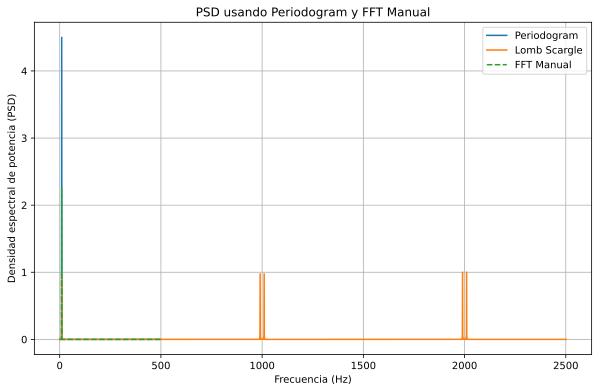

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from astropy.timeseries import LombScargle


# Generar una señal de ejemplo
fs = 1000  # frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # vector de tiempo
f = 10  # frecuencia de la señal
signal = 3*np.sin(2 * np.pi * f * t) #+ 0.5 * np.random.randn(t.size)

# Método 1: Usando periodogram
frequencies_periodogram, psd_periodogram = periodogram(signal, fs, scaling='density')

# Método 2: Usando FFT manualmente
n = len(signal)
f_fft = np.fft.fftfreq(n, 1/fs)
psd_fft = np.abs(np.fft.fft(signal) / n )**2 / t[-1]

frequencies_lombscargle_astropy, psd_lombscargle_astropy = LombScargle(t, signal, fit_mean=False).autopower()


# Solo tomar la mitad positiva del espectro
idx = np.argsort(f_fft)
f_fft = f_fft[idx]
psd_fft = psd_fft[idx]
positive_idx = f_fft >= 0
f_fft = f_fft[positive_idx]
psd_fft = psd_fft[positive_idx]
# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.plot(frequencies_periodogram, psd_periodogram, label='Periodogram')
plt.plot(frequencies_lombscargle_astropy, psd_lombscargle_astropy, label='Lomb Scargle')
plt.plot(f_fft, psd_fft, label='FFT Manual', linestyle='--')
plt.title('PSD usando Periodogram y FFT Manual')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.legend()
plt.grid(True)

plt.show()

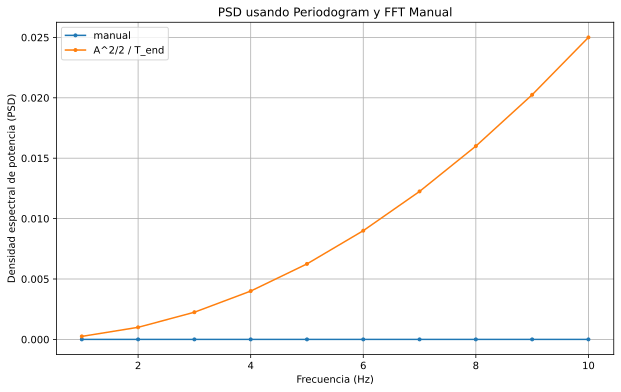

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, lombscargle
from astropy.timeseries import LombScargle

A_array = np.arange(1,11,1)
PSD_manual = np.zeros_like(A_array)
PSD_periodogram = np.zeros_like(A_array)
PSD_lombscargle_astropy = np.zeros_like(A_array)
PSD_lombscargle_scipy = np.zeros_like(A_array)

for i, A in enumerate(A_array):
    # Generar una señal de ejemplo
    fs = 5000  # frecuencia de muestreo
    t_end = 2000
    t = np.arange(-t_end/2, t_end/2, 1/fs)  # vector de tiempo
    f = 10  # frecuencia de la señal
    signal = A*np.sin(2 * np.pi * f * t) #+ 0.0005 * np.random.randn(t.size)

    # Método 1: Usando periodogram
    frequencies_periodogram, psd_periodogram = periodogram(signal, fs, scaling='density')
    # frequencies_lombscargle_astropy, psd_lombscargle_astropy = LombScargle(t, signal).autopower(normalization='psd')
    
    # frequencies_lombscargle_scipy = np.linspace(0.01, fs/2, len(t))
    # angular_frequencies = 2 * np.pi * frequencies_lombscargle_scipy
    # psd_lombscargle_scipy = lombscargle(t, signal, angular_frequencies, normalize=True)
    # psd_lombscargle_scipy = psd_lombscargle_scipy / (2 * np.pi)  # Convertir a densidad espectral de frecuencia


    # Método 2: Usando FFT manualmente
    n = len(signal)
    f_fft = np.fft.fftfreq(n, 1/fs)
    psd_fft = np.abs(np.fft.fft(signal) / n)**2 /t_end
    PSD_manual[i] = psd_fft.max()
    # PSD_periodogram[i] = psd_periodogram.max()
    # PSD_lombscargle_astropy[i] = psd_lombscargle_astropy.max()
    


# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.plot(A_array, PSD_manual,  '.-',label="manual")
plt.plot(A_array, A_array**2  / 2 / t_end, '.-', label="A^2/2 / T_end")
# plt.plot(A_array, PSD_periodogram,  '.-',label="periodogram")
# plt.plot(A_array, PSD_lombscargle_astropy, label="Lomb Scargle")
# plt.plot(A_array, PSD_lombscargle_scipy, label="Lomb-Scargle (scipy)")
plt.title('PSD usando Periodogram y FFT Manual')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
t = np.linspace(-10,10,0.001)
t_signal = np.sin(2*np.pi*10*t)
np.ff

1.6931471805599452

In [ ]:
8*np.pi/np.log(2*np.e)

14.843801836770403

In [ ]:
np.pi/np.log(2*np.e)

1.8554752295963004